In [721]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from scipy.stats import ttest_1samp
sys.path.append('../../')
import Constants as c
from scipy.stats import shapiro
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats import weightstats as stests

In [722]:
file = "calculate_metrics_h1_ML_combined.csv"
df = pd.read_csv(file)

In [723]:
df.drop(df.columns[0], axis=1)
df.dropna(subset=[c.PRED_25], inplace=True)
df.dropna(subset=[c.PRED_50], inplace=True)
df = df.sample(n=500)

In [724]:
def hypothesisTest_Effort(model, task, pred, mean):
    print("Hypothesis test for {0} and task = '{1}'".format(model, task))
    
    model_records = None

    if task != "ALL":
        filter1 = df[c.MODEL] == model
        filter2 = df[c.TASK] == task
        model_records = df[filter1 & filter2]
    else:
        model_records = df

    num_records = len(model_records)
    model_records_mean = round(model_records[pred].mean(),2)

    print("Number of records: {0}".format(num_records))
    print("Sample mean: ", model_records_mean)
    
    stat, p = shapiro(model_records[pred])
    print("Shapiro p-value: ", round(p, 4))

    is_gaussian = True
    alpha = 0.10

    if p > alpha:
        print('Shapiro Test: Sample looks Gaussian (fail to reject H0)')
    else:
        is_gaussian = False
        print('Shapiro Test: Sample does not look Gaussian (reject H0)')

    if is_gaussian:
        if num_records <= 30:
            ttest_result = ttest_1samp(model_records[pred], mean)
            print("One Sample T-test p-value: ", round(ttest_result.pvalue / 2, 4))
            
            if ttest_result.pvalue / 2 < alpha:
                print("One Sample T-Test: {0} sample mean is likely to be greater than {1} (fail to reject H0)".format(model_records_mean, mean))
            else:
                print("One Sample T-Test: {0} sample mean is not likely to be greater than {1} (reject H0)".format(model_records_mean, mean))
        else:
            ztest_result = stests.ztest(model_records[pred], x2=None, value=mean)[1]
            print("One Sample Z-test p-value: ", round(ztest_result / 2, 4))

            if ztest_result / 2 < alpha:
                print("One Sample Z-Test: {0} sample mean is likely to be greater than {1} (fail to reject H0)".format(model_records_mean, mean))
            else:
                print("One Sample Z-Test: {0} sample mean is not likely to be greater than {1} (reject H0)".format(model_records_mean, mean))
    
    else:
        sign_test_result  = sign_test(model_records[pred], mean)[1]
        print("One Sample Sign Test p-value: ", sign_test_result)

        if sign_test_result / 2 < alpha:
            print("One Sample Sign Test: {0} sample median is likely to be greater than {1} (fail to reject H0)".format(model_records_mean, mean))
        else:
            print("One Sample Sign Test: {0} sample median is not likely to be greater than {1} (reject H0)".format(model_records_mean, mean))

    plt.figure(figsize=(8,3))
    plt.tight_layout()
    sb.distplot(model_records[pred], kde=False, bins=10)


In [725]:
task = "BUG"

Hypothesis test for Line and task = 'BUG'
Number of records: 29
Sample mean:  0.44
Shapiro p-value:  0.1324
Shapiro Test: Sample looks Gaussian (fail to reject H0)
One Sample T-test p-value:  0.0222
One Sample T-Test: 0.44 sample mean is likely to be greater than 0.33 (fail to reject H0)


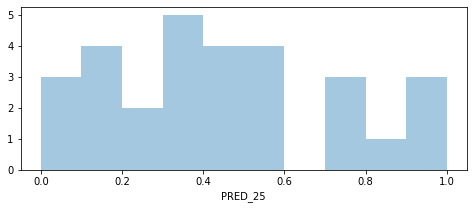

In [726]:
# t-test
hypothesisTest_Effort(c.LINE, task, c.PRED_25, 0.33)

Hypothesis test for Line and task = 'BUG'
Number of records: 29
Sample mean:  0.57
Shapiro p-value:  0.2518
Shapiro Test: Sample looks Gaussian (fail to reject H0)
One Sample T-test p-value:  0.2711
One Sample T-Test: 0.57 sample mean is not likely to be greater than 0.6 (reject H0)


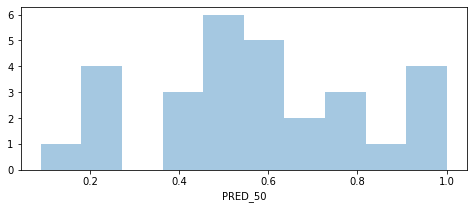

In [727]:
hypothesisTest_Effort(c.LINE, task, c.PRED_50, 0.60)

Hypothesis test for Module and task = 'BUG'
Number of records: 35
Sample mean:  0.62
Shapiro p-value:  0.0921
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  0.0018782254774123435
One Sample Sign Test: 0.62 sample median is likely to be greater than 0.53 (fail to reject H0)


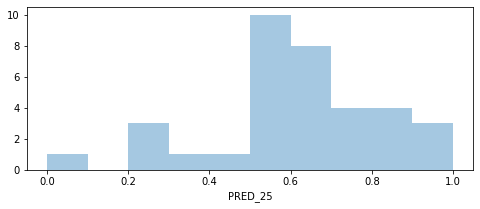

In [728]:
# t-test
hypothesisTest_Effort(c.MODULE, task, c.PRED_25, 0.53)

Hypothesis test for Module and task = 'BUG'
Number of records: 35
Sample mean:  0.79
Shapiro p-value:  0.0001
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  0.17546524899080426
One Sample Sign Test: 0.79 sample median is likely to be greater than 0.87 (fail to reject H0)


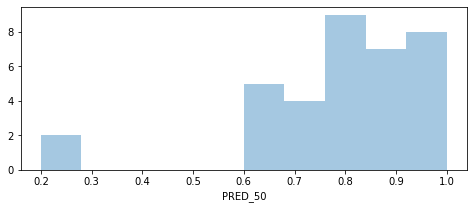

In [729]:
hypothesisTest_Effort(c.MODULE, task, c.PRED_50, 0.87)